# <p style="background-color:blue; font-family:calibri; color:white; font-size:130%; text-align:center; border-radius:20px 50px;">Capstone Project | E-Commerce Customer Segmentation and Prediction</p>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=Blue>Problem:</font></h3>

In this project, we explore a dataset containing comprehensive purchasing patterns of e-commerce customers, including transaction history, frequency of purchases, recency, and monetary value. Our goal is to build a robust customer segmentation model and a predictive classifier to accurately categorize customers based on their purchasing behavior. With the high stakes of customer retention and personalized marketing, our key focus is on identifying high-value customers and predicting future purchasing trends, making precision in identifying these valuable segments a critical metric for optimizing marketing strategies and improving customer satisfaction.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Objectives:</font></h3>

- Establish preprocessing pipelines, ensuring features are scaled where necessary.
- Implement and tune clustering models such as *__K-Means__ and *__Hierarchical Clustering__ for customer segmentation.
- Build and fine-tune predictive classifiers including *__Random Forest__, *__XGBoost__, and *__Logistic Regression__ to forecast customer purchasing behavior.
- Prioritize identifying high-value customer segments for targeted marketing and retention strategies.
- *__Evaluate and Compare Model Performance:__
  Use metrics like elbow method for clustering, and precision, recall, and F1-score for classifiers, ensuring a balance between accuracy and business utility.

<a id="import"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [56]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage

# Outlier Detection and Missing Data
from scipy import stats

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,confusion_matrix,silhouette_score
from sklearn.model_selection import GridSearchCV
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:blue ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [2]:
 import os

In [3]:
os.getcwd()

'C:\\Users\\LENOVO'

In [4]:
os.chdir(r"C:\Users\LENOVO\Desktop\Capstone Project")

In [5]:
df = pd.read_csv('e-commerce_data.csv', encoding='ISO-8859-1')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

<a id="overview"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 30px;">Step 3 | Dataset Overview</p>

<a id="basic"></a>
# <b><span style='color:blue'>Step 3.1 |</span><span style='color:blue'> Dataset Basic Information</span></b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
df.shape

(541909, 8)

<a id="num_statistics"></a>
# <b><span style='color:blue'>Step 3.2 |</span><span style='color:blue'> Summary Statistics for Numerical Variables</span></b>

In [9]:
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 3.3 |</span><span style='color:blue'> Summary Statistics for Categorical  Variables</span></b>

In [10]:
df.describe(include='object')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>



* **Number of Entries**: The dataset consists of 541909s]__ entrit).

* **Columns**: There are __8 columns__ in the dataset corresponding to different attributes related to customer transactions, including invoice details, stock codes, and customer information.

* **Data Types**:
    - The columns `InvoiceNo`, `StockCode`, `Quantity`, `InvoiceDate`, `UnitPrice`, and `Country` are of type __int64__ or __object__.
    - The column `Description` has missing values, indicating that some products may lack proper descriptions.
    - The column `CustomerID` has __135,080__ missing values, suggesting that a significant portion of the data lacks customer identification.

* **Missing Values**:
    - The `Description` column has __1,454__ missing values.
    - The `CustomerID` column has __135,080__ missing values, which might impact analysis of customer-specific trends.
    - Other columns like `InvoiceNo`, `StockCode`, `Quantity`, `InvoiceDate`, `UnitPrice`, and `Country` have no missing values.



<a id="overview"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 30px;">Step 4 | Data Preprocessing</p>

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.1 |</span><span style='color:blue'> Handling Missing Values</span></b>

In [11]:
# Checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# Dropping rows with missing CustomerID since this is crucial for customer segmentation
df_clean = df.dropna(subset=['CustomerID'])

# Filling missing values in the Description column with "Unknown"
df_clean['Description'] = df_clean['Description'].fillna('Unknown')

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.2 |</span><span style='color:blue'> Convert InvoiceDate to Datetime</span></b>

In [13]:
# Converting InvoiceDate column to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.3 |</span><span style='color:blue'> Create New Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
(a)TotalSales: Calculate the total sales for each transaction.

In [14]:
# Creating a new column 'TotalPrice' which is Quantity * UnitPrice
df_clean['TotalSales'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['MonthYear'] = df_clean['InvoiceDate'].dt.to_period('M')

In [15]:
# Example check: Are there invoices with TotalSales not matching Quantity * UnitPrice?
mismatched_entries = df_clean[df_clean['TotalSales'] != df_clean['Quantity'] * df_clean['UnitPrice']]
mismatched_entries

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalSales, MonthYear]
Index: []

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
b) Recency: Calculate the number of days since the customer last made a purchase.

In [16]:
# Finding the most recent invoice date for recency calculation
most_recent_date = df_clean['InvoiceDate'].max()

# Calculating Recency: Days since the customer's last purchase
df_clean['Recency'] = (most_recent_date - df_clean['InvoiceDate']).dt.days

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.4 |</span><span style='color:blue'> Drop the Duplicates</span></b>

In [17]:
# Dropping duplicate rows, if any
df_clean = df_clean.drop_duplicates()
df_clean

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
...                    ...        ...         ...             ...         ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20   
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60   
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85   

       MonthYear  Recency  
0        2010-12      373  
1        2010-12      373  
2        2010-12      373  
3        2010-12      373  
4        2010-12      373  
...          ...      ...  
541904   2011-12        0  
541905   2011-12        0  
541906   2011-12        0  
541907   2011-12        0  
541908   2011-12        0  

[401604 rows x 11 columns]

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.5 |</span><span style='color:blue'> Feature Engineering</span></b>

In [18]:
# Feature Engineering - For illustration, defining 'HighPurchase' based on Quantity
df_clean['HighPurchase'] = np.where(df_clean['Quantity'] > df_clean['Quantity'].median(), 1, 0)
df_clean['HighPurchase']

0         1
1         1
2         1
3         1
4         1
         ..
541904    1
541905    1
541906    0
541907    0
541908    0
Name: HighPurchase, Length: 401604, dtype: int32

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.6 |</span><span style='color:blue'> Handling Outliers</span></b>

In [19]:
# Defining a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers in Quantity and UnitPrice
df_clean = remove_outliers(df_clean, 'Quantity')
df_clean = remove_outliers(df_clean, 'UnitPrice')

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.7 |</span><span style='color:blue'>Defining Skewness</span></b>

Quantity        1.101447
UnitPrice       1.079301
CustomerID      0.012949
TotalSales      3.011423
Recency         0.430604
HighPurchase   -0.004448
dtype: float64


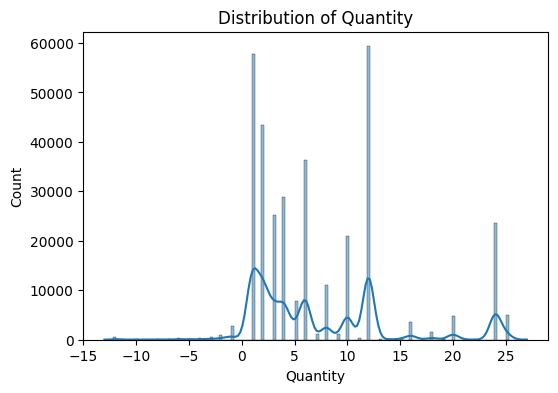

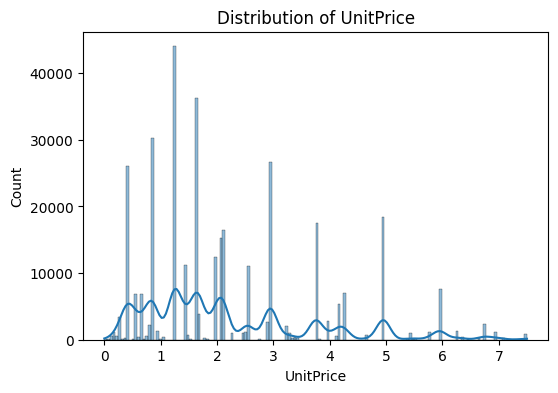

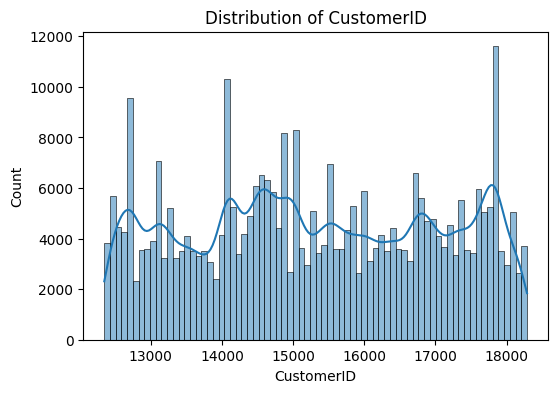

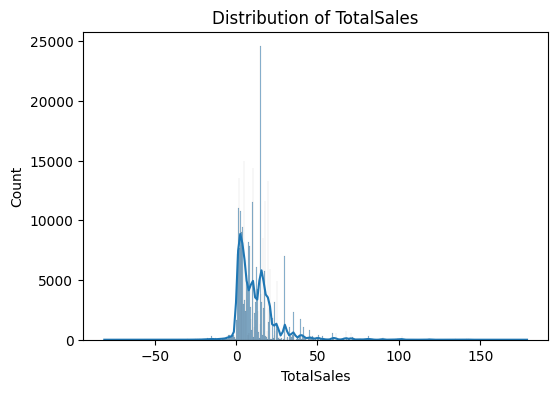

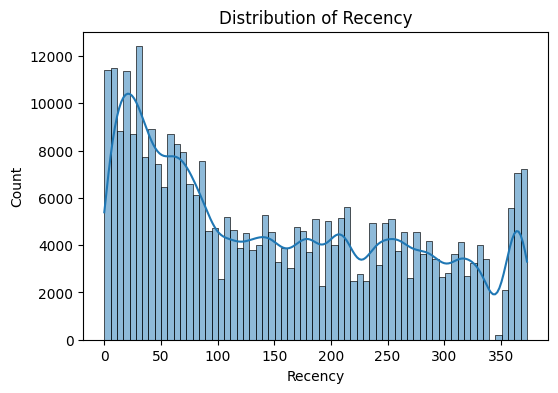

In [20]:
skewness = df_clean.skew(numeric_only=True)
print(skewness)


for column in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 4.8 |</span><span style='color:blue'> Standard Scaling</span></b>

In [21]:
scaler = StandardScaler()
df_clean[['Quantity', 'UnitPrice', 'TotalSales']] = scaler.fit_transform(
    df_clean[['Quantity', 'UnitPrice', 'TotalSales']])
df_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.195929   
1    536365     71053                  WHITE METAL LANTERN -0.195929   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.094332   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.195929   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.195929   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00   0.223622     17850.0  United Kingdom    0.206799   
1 2010-12-01 08:26:00   0.765671     17850.0  United Kingdom    0.581996   
2 2010-12-01 08:26:00   0.352681     17850.0  United Kingdom    0.705573   
3 2010-12-01 08:26:00   0.765671     17850.0  United Kingdom    0.581996   
4 2010-12-01 08:26:00   0.765671     17850.0  United Kingdom    0.581996   

  MonthYear  Recency  HighPurchase  
0   2010-12      373             1  
1   2010-12      373             1  
2   2010-12      373             1  
3   2010-12      373             1  
4   2010-12      373             1

In [22]:
# Apply log transformation
df_clean['LogQuantity'] = np.log1p(df_clean['Quantity'])
df_clean['LogTotalSales'] = np.log1p(df_clean['TotalSales'])


<a id="overview"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 30px;">Step 5 | Exploratory Data Analysis(EDA)</p>

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.1 |</span><span style='color:blue'>Customer Segmentation Using RFM (Recency, Frequency, Monetary)</span></b>

In [23]:
# Calculate Recency, Frequency, and Monetary (RFM) per CustomerID
reference_date = df_clean['InvoiceDate'].max()  # reference date (e.g., latest date in the dataset)
rfm_data = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalSales': 'sum'                                        # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSales': 'Monetary'})


In [24]:
# Generate aggregate features at the customer level
rfm_data['AverageOrderValue'] = rfm_data['Monetary'] / rfm_data['Frequency']


In [25]:
# Drop columns not needed for analysis
df_clean = df_clean.drop(columns=['InvoiceNo', 'StockCode'])


<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.2 |</span><span style='color:blue'>Sales Trends Over Time</span></b>

Monthly Sales DataFrame:
 Year         2010         2011
Month                         
1             NaN   322.886485
2             NaN   599.961442
3             NaN  -297.722779
4             NaN   -74.424011
5             NaN  2006.840361
6             NaN    81.144926
7             NaN   -88.807977
8             NaN  1134.481725
9             NaN  3262.011644
10            NaN -1474.965016
11            NaN -4727.304378
12     218.123197  -962.225619


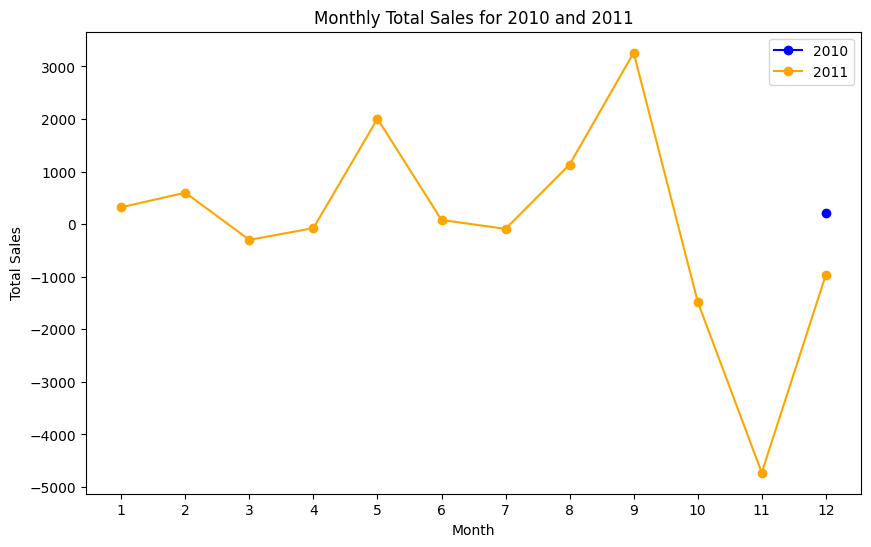

In [26]:
# Extract Year and Month columns for easier grouping
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month

# Group by Year and Month and calculate monthly total sales
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalSales'].sum().unstack(level=0)

# Check the structure of monthly_sales
print("Monthly Sales DataFrame:\n", monthly_sales)

# Plotting
plt.figure(figsize=(10, 6))

# Plot 2010 sales if it exists
if 2010 in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[2010], label='2010', marker='o', color='b')

# Plot 2011 sales if it exists
if 2011 in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[2011], label='2011', marker='o', color='orange')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales for 2010 and 2011')
plt.legend()
plt.xticks(range(1, 13))  # Set x-axis to show each month

plt.show()

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.3 |</span><span style='color:blue'>Top Selling Products</span></b>

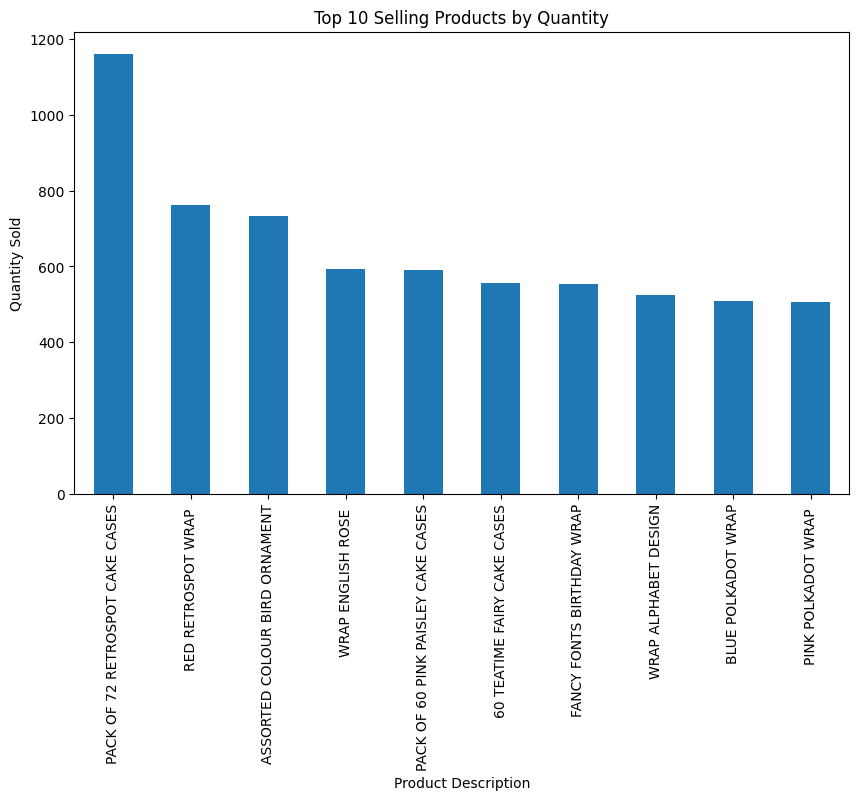

In [27]:
# Aggregating sales and quantities for each product
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting top-selling products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products by Quantity')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=90)
plt.show()


<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.4 |</span><span style='color:blue'>Products Purchased 45 or More Times by Each Customers</span></b>

        CustomerID                        Description  PurchaseCount
0          12347.0       3D DOG PICTURE PLAYING CARDS              3
1          12347.0           3D SHEET OF CAT STICKERS              1
2          12347.0           3D SHEET OF DOG STICKERS              1
3          12347.0        60 TEATIME FAIRY CAKE CASES              3
4          12347.0     72 SWEETHEART FAIRY CAKE CASES              3
...            ...                                ...            ...
233874     18287.0    SMALL YELLOW BABUSHKA NOTEBOOK               1
233875     18287.0  STAR T-LIGHT HOLDER WILLIE WINKIE              1
233876     18287.0     STRAWBERRY CERAMIC TRINKET BOX              1
233877     18287.0      SWISS CHALET TREE DECORATION               2
233878     18287.0  TREE T-LIGHT HOLDER WILLIE WINKIE              1

[233879 rows x 3 columns]


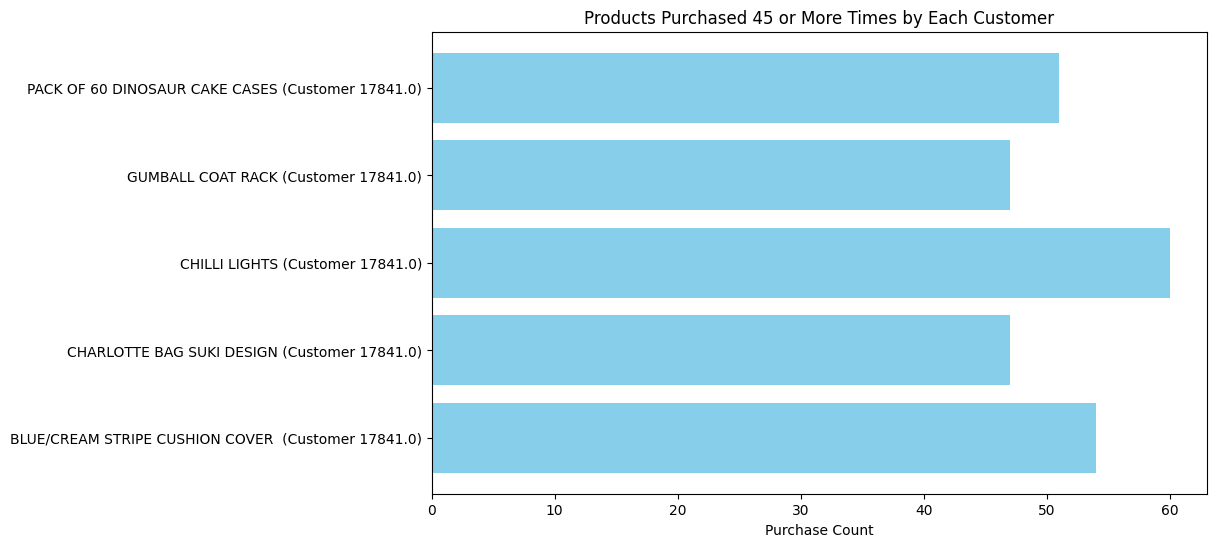

In [28]:
product_counts = df_clean.groupby(['CustomerID', 'Description']).size().reset_index(name='PurchaseCount')

print(product_counts)


# Filter for only products with PurchaseCount >= 3
filtered_counts = product_counts[product_counts['PurchaseCount'] >= 45]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.barh(filtered_counts['Description'] + ' (Customer ' + filtered_counts['CustomerID'].astype(str) + ')',
         filtered_counts['PurchaseCount'], color='skyblue')

plt.xlabel('Purchase Count')
plt.title('Products Purchased 45 or More Times by Each Customer')
plt.show()

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.5 |</span><span style='color:blue'>Top 5 Customers by Total Sales</span></b>

      CustomerID   TotalSales
1840     14911.0  1874.524625
549      13089.0  1247.378784
1256     14088.0   895.682846
1401     14298.0   873.055854
1229     14051.0   611.144297


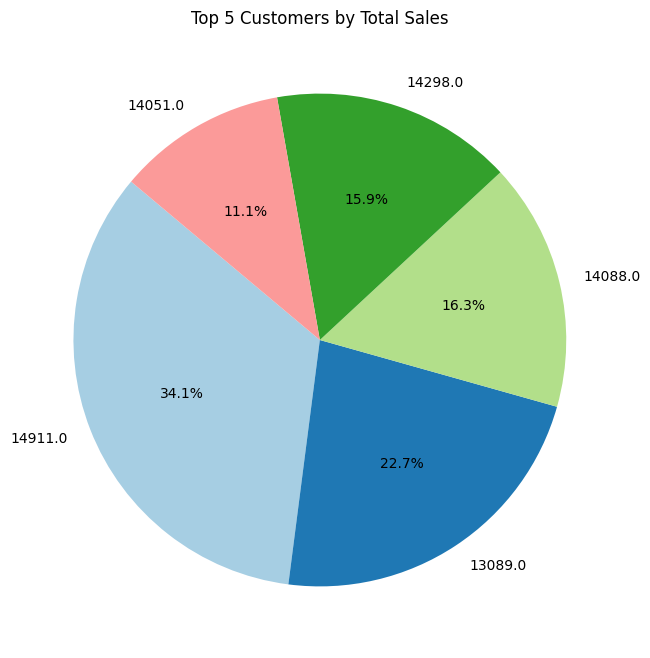

In [29]:
# Calculate total spending per customer
customer_spending = df_clean.groupby('CustomerID')['TotalSales'].sum().reset_index()

# Sort customers by total spend in descending order
top_customers = customer_spending.sort_values(by='TotalSales', ascending=False).head(5)

print(top_customers)


# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_customers['TotalSales'],
    labels=top_customers['CustomerID'].astype(str),
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Start angle for the pie chart
    colors=plt.cm.Paired.colors[:5]  # Set a color palette
)

plt.title('Top 5 Customers by Total Sales')
plt.show()

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.6 |</span><span style='color:blue'>Uniques Items count in the Description Column</span></b>

In [30]:
unique_items = df['Description'].unique()

print("Unique items in Description column:")
print(unique_items)

unique_count = df['Description'].nunique()

print("Count of unique items in Description column:")
print(unique_count)

Unique items in Description column:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Count of unique items in Description column:
4223


<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.7 |</span><span style='color:blue'>Principal Component Analysis</span></b>

In [31]:
# Step 1: Select numerical columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int32', 'int64']).columns
X = df_clean[numeric_cols]

# Step 2: Impute missing values with the median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))


Explained variance by each component: [0.37574846 0.16867323 0.15825425 0.13190866 0.09555658 0.02965567]
Total explained variance: 0.9597968427487553


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339453 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Description    339453 non-null  object        
 1   Quantity       339453 non-null  float64       
 2   InvoiceDate    339453 non-null  datetime64[ns]
 3   UnitPrice      339453 non-null  float64       
 4   CustomerID     339453 non-null  float64       
 5   Country        339453 non-null  object        
 6   TotalSales     339453 non-null  float64       
 7   MonthYear      339453 non-null  period[M]     
 8   Recency        339453 non-null  int64         
 9   HighPurchase   339453 non-null  int32         
 10  LogQuantity    333265 non-null  float64       
 11  LogTotalSales  333555 non-null  float64       
 12  Year           339453 non-null  int32         
 13  Month          339453 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), obj

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 5.8 |</span><span style='color:blue'>Country-wise Sales Analysis</span></b>

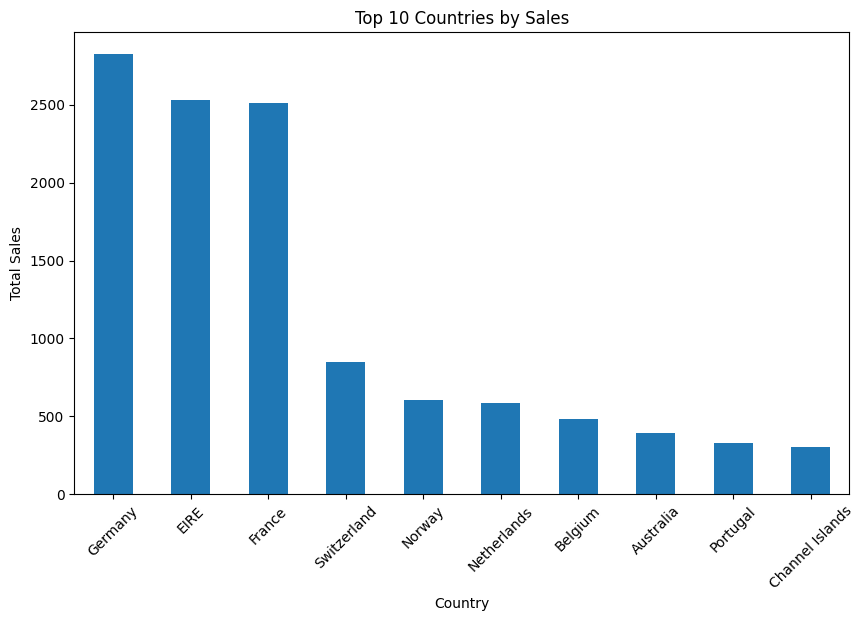

In [33]:
# Aggregating sales by country
country_sales = df_clean.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plotting sales by country
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Observation</font></h3>

- *__Top Customer:__ Customer ID 14911 contributed *__34.1%__ of total sales, amounting to 1874.52.
- *__Unique Items:__ The dataset contains *__4,223__ unique items.
- *__Total Sales Calculation:__ Derived from Quantity multiplied by UnitPrice.
- *__High Sales Regions:__ Sales were notably high in *__Germany__, *__EIRE__, and *__France.__
- *__Low Sales Regions:__ Sales were significantly lower in *__Australia__, *__Portugal__, and the *__Channel Islands.__
- *__Peak Sales Month:__ *__September__ had the highest sales volume.
- *__Sales Drop:__ During *__October__, *__November__, and *__December 2011__, there was a noticeable decline in sales.
- *__December Comparison:__ Sales in *__December 2010__ were slightly higher than in December 2011.

<a id="overview"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 30px;">Step 6 | Model Selection</p>

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 6.1 |</span><span style='color:blue'>Logistic Regression</span></b>

In [34]:
# Preprocessing
X = df_clean[['TotalSales']]
y = df_clean['HighPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
# Calculate Accuracy
LR_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {LR_accuracy:.4f}')


# Confusion Matrix
confusion = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(confusion)


# Generate Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.7540
Confusion Matrix:
[[54659 12994]
 [20407 47722]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     67653
           1       0.79      0.70      0.74     68129

    accuracy                           0.75    135782
   macro avg       0.76      0.75      0.75    135782
weighted avg       0.76      0.75      0.75    135782



<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 6.2 |</span><span style='color:blue'>Random Forest</span></b>

In [37]:
X = df_clean[['TotalSales']]
y = df_clean['HighPurchase']


#split the data into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)




rf = RandomForestClassifier(n_estimators=80, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [38]:
y_pred2 = rf.predict(X_test)


RF_accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {RF_accuracy:.4f}')


confusion = confusion_matrix(y_test,y_pred2)
print('Confusion Matrix:')
print(confusion)


# Generate Classification Report
report = classification_report(y_test, y_pred2)
print('Classification Report:')
print(report)

Accuracy: 0.9285
Confusion Matrix:
[[61290  6394]
 [ 3318 64780]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     67684
           1       0.91      0.95      0.93     68098

    accuracy                           0.93    135782
   macro avg       0.93      0.93      0.93    135782
weighted avg       0.93      0.93      0.93    135782



<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 6.3|</span><span style='color:blue'>XGBoost</span></b>

In [39]:
# Preprocessing
X = df_clean[['TotalSales']]
y = df_clean['HighPurchase']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
y_pred4 = xgboost.predict(X_test)

# Evaluation
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
print(f'XGBoost - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


XGB_accuracy = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {XGB_accuracy:.4f}')


confusion = confusion_matrix(y_test,y_pred4)
print('Confusion Matrix:')
print(confusion)


report = classification_report(y_test, y_pred4)
print('Classification Report:')
print(report)

XGBoost - Precision: 0.8951, Recall: 0.8875, F1 Score: 0.8913
Accuracy: 0.8914
Confusion Matrix:
[[60567  7086]
 [ 7665 60464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     67653
           1       0.90      0.89      0.89     68129

    accuracy                           0.89    135782
   macro avg       0.89      0.89      0.89    135782
weighted avg       0.89      0.89      0.89    135782



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Model Selection for Customer Purchasing Behaviour</font></h3>


*__1. Overall Performance:__
  - *__Accuracy:__ Random Forest achieved the highest accuracy at 0.9272, significantly higher than XGBoost (0.8914) and Logistic Regression (0.7540).
  - *__Precision, Recall, and F1-score:__ Random Forest has high values across all three metrics (precision, recall, F1-score), with precision of 0.96 for class 0 and recall of 0.96 for class 1, indicating a good balance between correctly identifying both classes (purchasers and non-purchasers).
    




*__2. Confusion Matrix Analysis__
The confusion matrix shows that Random Forest has a relatively low number of false positives and false negatives compared to the other models, making it a more balanced model for both classes.





*__3. Interpretation of Precision and Recall
are critical when predicting customer purchasing behavior:__
- Random Forest has a precision of *__0.90__ and a recall of *__0.96__ for the positive class (purchasers), which indicates it is both accurate in predicting purchasers and captures almost all purchasing behavior accurately.
- XGBoost has good performance but slightly lower precision and recall for the positive class (purchasers) compared to Random Forest.
- Logistic Regression shows weaker performance, with much lower recall for purchasers (0.70) and more variability across metrics.





*__4. Business Implications__
- Since *__Random Forest__ balances *__both high accuracy and strong performance__ in precision and recall, it is likely to provide more reliable predictions, which are crucial for targeting customer segments effectively.
- A model with high recall and precision helps ensure that you can identify actual purchasers accurately while minimizing incorrect classifications, leading to more effective customer engagement strategies.


<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 6.4|</span><span style='color:blue'>KMeans</span></b>

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339453 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Description    339453 non-null  object        
 1   Quantity       339453 non-null  float64       
 2   InvoiceDate    339453 non-null  datetime64[ns]
 3   UnitPrice      339453 non-null  float64       
 4   CustomerID     339453 non-null  float64       
 5   Country        339453 non-null  object        
 6   TotalSales     339453 non-null  float64       
 7   MonthYear      339453 non-null  period[M]     
 8   Recency        339453 non-null  int64         
 9   HighPurchase   339453 non-null  int32         
 10  LogQuantity    333265 non-null  float64       
 11  LogTotalSales  333555 non-null  float64       
 12  Year           339453 non-null  int32         
 13  Month          339453 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), obj

In [41]:
df_clean = df_clean.drop('MonthYear', axis=1)

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339453 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Description    339453 non-null  object        
 1   Quantity       339453 non-null  float64       
 2   InvoiceDate    339453 non-null  datetime64[ns]
 3   UnitPrice      339453 non-null  float64       
 4   CustomerID     339453 non-null  float64       
 5   Country        339453 non-null  object        
 6   TotalSales     339453 non-null  float64       
 7   Recency        339453 non-null  int64         
 8   HighPurchase   339453 non-null  int32         
 9   LogQuantity    333265 non-null  float64       
 10  LogTotalSales  333555 non-null  float64       
 11  Year           339453 non-null  int32         
 12  Month          339453 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), object(2)
memory usage: 32.4+ MB


In [43]:
X1 = df_clean.iloc[:,6:8].values
X1

array([[2.06798830e-01, 3.73000000e+02],
       [5.81996069e-01, 3.73000000e+02],
       [7.05572938e-01, 3.73000000e+02],
       ...,
       [3.03575895e-01, 0.00000000e+00],
       [3.03575895e-01, 0.00000000e+00],
       [1.73299076e-01, 0.00000000e+00]])

In [44]:
# Assuming X1 is a DataFrame
# Impute NaN values with the median
imputer = SimpleImputer(strategy="median")
X1_imputed = imputer.fit_transform(X1)

# Fit KMeans on the imputed data
k_range = range(1, 11)  # Example range for k
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1_imputed)  # Use the imputed data
    inertia.append(kmeans.inertia_)


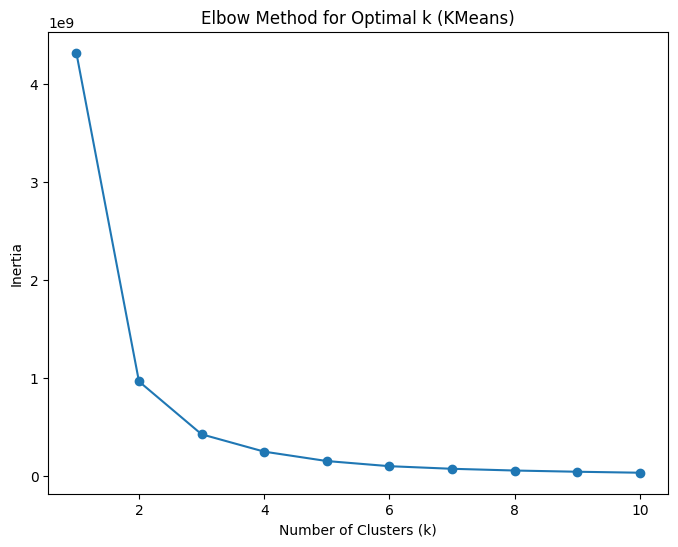

In [45]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (KMeans)')
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 5,init='k-means++',random_state =42)
y_kmeans = kmeans.fit_predict(X1_imputed)

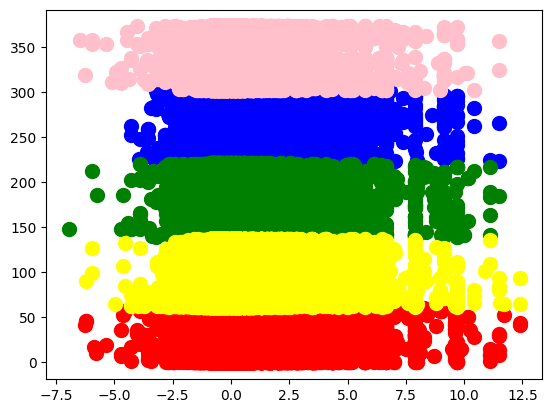

In [47]:
from matplotlib.colors import ListedColormap
plt.scatter(X1_imputed[y_kmeans==0,0], X1_imputed[y_kmeans==0,1],s=100,c='red',label='Cluster-1')
plt.scatter(X1_imputed[y_kmeans==1,0], X1_imputed[y_kmeans==1,1],s=100,c='blue',label='Cluster-2')
plt.scatter(X1_imputed[y_kmeans==2,0], X1_imputed[y_kmeans==2,1],s=100,c='green',label='Cluster-3')
plt.scatter(X1_imputed[y_kmeans==3,0], X1_imputed[y_kmeans==3,1],s=100,c='pink',label='Cluster-4')
plt.scatter(X1_imputed[y_kmeans==4,0], X1_imputed[y_kmeans==4,1],s=100,c='yellow',label='Cluster-5')

<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 6.5|</span><span style='color:blue'>Hierarchical Clustering</span></b>

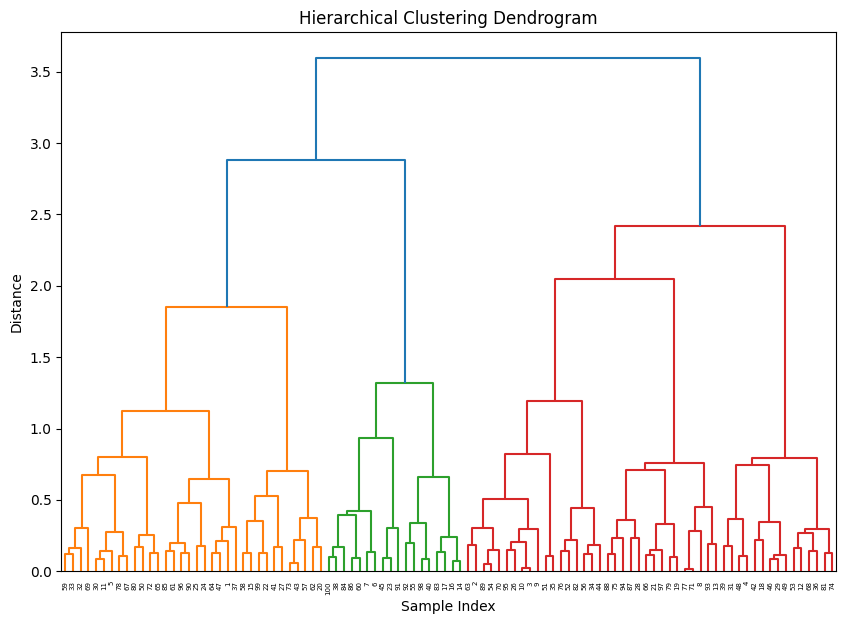

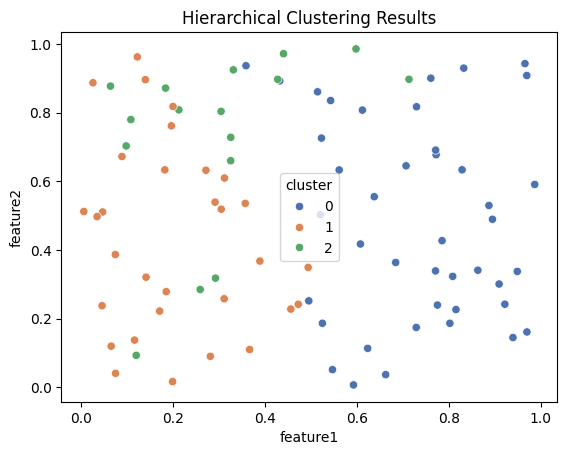

In [48]:
# Example DataFrame
# Replace this with your actual data
# df = pd.read_csv('your_dataset.csv')
# X1 = df.select_dtypes(include=['float64', 'int32', 'int64'])  # Use relevant numeric columns

# For the purpose of this example, let's create a sample DataFrame with NaN values
np.random.seed(42)
X1 = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100)
})
X1.loc[0:10, 'feature2'] = np.nan  # Introduce NaN values for demonstration

# Step 1: Impute NaN values with the median
imputer = SimpleImputer(strategy="median")
X1_imputed = imputer.fit_transform(X1)

# Step 2: Perform Hierarchical Clustering
# Using the 'ward' method for linkage
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X1_imputed)

# Optional: Adding cluster labels to the DataFrame for visualization
X1['cluster'] = model.labels_

# Step 3: Plot Dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(X1_imputed, 'ward')
dendrogram(linked, orientation='top', labels=np.arange(1, len(X1_imputed) + 1), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Optional: Plotting the clusters
sns.scatterplot(data=X1, x='feature1', y='feature2', hue='cluster', palette='deep')
plt.title('Hierarchical Clustering Results')
plt.show()


<a id="cat_statistics"></a>
# <b><span style='color:blue'>Step 6.6|</span><span style='color:blue'>DBSCAN Clustering</span></b>

In [49]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data


In [50]:
# Fit the DBSCAN model
clusters = dbscan.fit_predict(X_scaled)


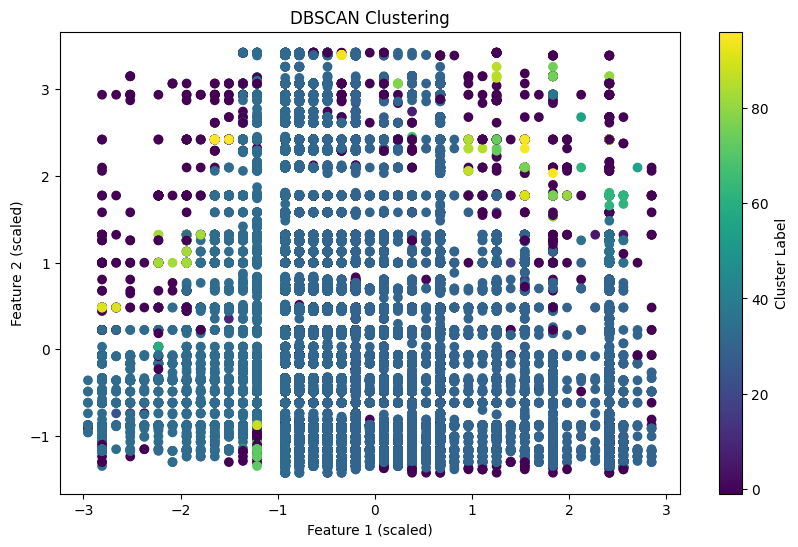

In [51]:
df_clean['Cluster'] = clusters

# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("DBSCAN Clustering")
plt.colorbar(label='Cluster Label')
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Model Selection for Customer Segmentation</font></h3>

*__1. Interpretation of K-Means Clusters (5 Clusters):__

- The *__Elbow Method__ indicated that 5 clusters is the best balance of compactness and separation for K-Means. This could suggest that K-Means has identified more nuanced segments within your customer base.
- *__Possible interpretation:__ The 5 clusters might include further divisions among high-value, mid-value, and low-value customers, potentially with different purchasing patterns or preferences within each value segment.

*__2.Interpretation of Hierarchical Clusters (3 Clusters):__

- Hierarchical Clustering's 3 clusters likely point to broader, more generalized customer segments.
- *__Possible interpretation:__ These 3 clusters could represent primary groups, such as high, medium, and low spenders, without the finer distinctions captured by K-Means.

*__3.Comparing Clustering Results:__

- *__K-Means:__ Offers a more detailed segmentation with 5 clusters, which can be useful if you need more specific customer profiles for targeted strategies.
- *__Hierarchical Clustering:__ Provides a more streamlined grouping, suitable for broader marketing approaches or initial analysis.
- *__Consider using both results depending on business needs:__ the 5-cluster segmentation for precise targeting and the 3-cluster approach for more general customer insights.







Using K-Means, we identified 5 distinct customer segments based on total sales, suggesting varied purchasing patterns within each group. Hierarchical Clustering revealed 3 broader segments, pointing to general customer categories (e.g., high, medium, and low spenders). These results highlight the value of both clustering approaches: *__K-Means offers detailed segmentation for targeted strategies, while Hierarchical Clustering supports broader customer insights.__


In [52]:
import joblib

joblib.dump(rf, 'trained_model.pkl')

['trained_model.pkl']

In [53]:
model = joblib.load('trained_model.pkl')

In [54]:
from IPython.display import FileLink

# Display a download link
FileLink(r'trained_model.pkl')

C:\Users\LENOVO\Desktop\Capstone Project\trained_model.pkl

In [55]:
from IPython.display import HTML
import base64

def create_download_link(filename):
    with open(filename, "rb") as file:
        data = file.read()
    b64 = base64.b64encode(data).decode()  # Convert to base64 encoding
    href = f'<a download="{filename}" href="data:application/octet-stream;base64,{b64}">Download {filename}</a>'
    return HTML(href)

# Use this function with your file
create_download_link("trained_model.pkl")
